In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
!pip install transformers
!pip install torch


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from transformers import BeitForSemanticSegmentation, BeitFeatureExtractor
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt


In [10]:
model = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')




In [11]:
# Load an image
url = 'https://images.unsplash.com/photo-1574158622682-e40e69881006'
image = Image.open(requests.get(url, stream=True).raw)

In [12]:
inputs = feature_extractor(images=image, return_tensors="pt")


In [13]:
with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits


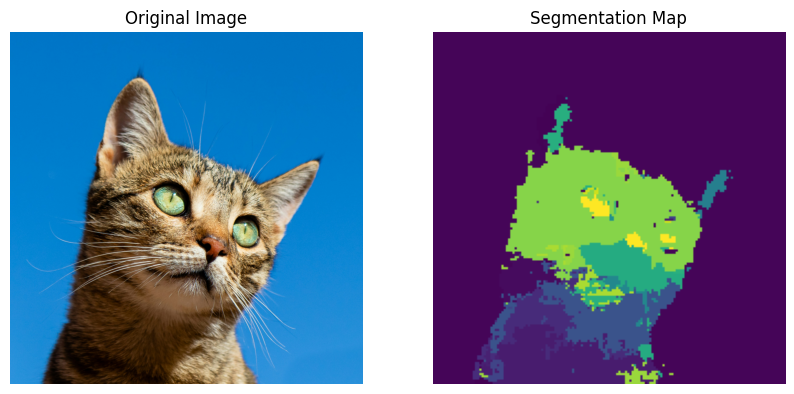

In [14]:
# Get the predicted segmentation map
segmentation = torch.argmax(logits.squeeze(), dim=0).cpu().numpy()

# Plot the original image and the segmentation map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmentation)
plt.title('Segmentation Map')
plt.axis('off')
plt.show()
